In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True, readonly=False)

Mounted at /content/drive


In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh

exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Receiving objects: 100% (76/76), 318.16 KiB | 14.46 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.tmux.conf
./root/.bin.priority/
./root/.bin.priority/pip3
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.vimrc
./root/.profile
./root/.bashrc.biolab
./root/.condarc
--2024-06-13 16:37:33--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143808873 (137M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 137.15M  

Google CoLab에서 shell command를 실행할 때는 명령 앞에 !을 붙이면 실행할 수 있습니다.

In [ ]:
!ls -al /content/drive/MyDrive/binfo1-work/

total 8306236
-rw------- 1 root root 1370036258 May  9 05:19 CLIP-35L33G.bam
-rw------- 1 root root    3118336 May  9 05:19 CLIP-35L33G.bam.bai
-rw------- 1 root root       8601 May 18 16:47 CLIP-let7g.bam
-rw------- 1 root root       2814 May 18 15:17 CLIP-let7g_first.txt
-rw------- 1 root root      14561 May 18 14:12 CLIP-let7g-gene.pileup
-rw------- 1 root root    2685065 May 18 13:42 CLIP-let7g.pileup
-rw------- 1 root root       8604 May 18 16:47 CLIP-mirlet7d.bam
-rw------- 1 root root       2665 May 18 16:47 CLIP-mirlet7d-bedgraph.txt
-rw------- 1 root root      20809 May 18 16:47 CLIP-mirlet7d-gene.pileup
-rw------- 1 root root      20809 May 18 16:47 CLIP-mirlet7d.pileup
-rw------- 1 root root       7217 May 18 16:47 CLIP-mirlet7f-1.bam
-rw------- 1 root root       2403 May 18 16:47 CLIP-mirlet7f-1-bedgraph.txt
-rw------- 1 root root      15266 May 18 16:47 CLIP-mirlet7f-1-gene.pileup
-rw------- 1 root root      17802 May 18 16:47 CLIP-mirlet7f-1.pileup
-rw------- 1 root root 

In [ ]:
%cd /content/drive/MyDrive/binfo1-work

/content/drive/MyDrive/binfo1-work


In [ ]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 7 BAM files                                      ||
||                                                                            ||
||                           CLIP-35L33G.bam                                  ||
||                           CLIP-let7g.bam                                   ||
||                           RNA-control.bam                     

In [ ]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#')
cnts.head()

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
0,ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0
1,ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0
2,ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0
3,ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0
4,ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0


In [ ]:
# example
cnts = cnts[(cnts['RNA-control.bam'] >= 20) & (cnts['RNA-siLuc.bam'] >= 20)]
print(len(cnts))
cnts = cnts[cnts['RPF-siLuc.bam'] >= 60]
print(len(cnts))

11484
8761


In [ ]:
cnts = cnts[(cnts['RNA-control.bam'] >= 30) & (cnts['RNA-siLuc.bam'] >= 30)]
print(len(cnts))
cnts = cnts[cnts['RPF-siLuc.bam'] >= 80]
print(len(cnts))

7988
7988


In [ ]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
30,ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,95,93,100,42,75,1.926316,0.602151
31,ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,1355,3022,2563,1859,3191,2.962362,0.494091
35,ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,762,2130,2225,328,609,2.175853,0.562609
43,ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,474,1260,1031,603,1128,2.343882,0.437418
53,ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,0,280,694,903,132,251,5.428571,0.684272


In [ ]:
len(cnts)

7988

In [ ]:
import pandas as pd
import numpy as np
cnts['clip_enrichment_log2'] = np.log2(cnts['clip_enrichment'])
cnts['rden_change_log2'] = np.log2(cnts['rden_change'])
cnt_df = cnts.replace([np.inf, -np.inf], np.nan).dropna(subset=['clip_enrichment_log2', 'rden_change_log2'])
print(len(cnt_df))
cnt_df.head()


8755


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,clip_enrichment_log2,rden_change_log2
30,ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,0,95,93,100,42,75,1.926316,0.602151,0.945844,-0.731804
31,ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,1355,3022,2563,1859,3191,2.962362,0.494091,1.566748,-1.017152
35,ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,762,2130,2225,328,609,2.175853,0.562609,1.121581,-0.829795
43,ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,474,1260,1031,603,1128,2.343882,0.437418,1.228900,-1.192917
53,ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,0,280,694,903,132,251,5.428571,0.684272,2.440573,-0.547359


In [ ]:
max(cnt_df['rden_change_log2'])

1.7531238220308063

In [ ]:
cnts = cnt_df
cnts['rank'] = cnts['clip_enrichment'].rank(ascending=False, method='first')

thresholds = [0.05, 0.20, 0.50, 1.00]
groups = ['Top 5%', '5-20%', '20-50%', '50-100%']
percentiles = [cnts['rank'].quantile(q) for q in thresholds]

cnts['group'] = pd.cut(cnts['rank'], bins=[0] + percentiles, labels=groups)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [ ]:
cnts['Geneid'] = cnts['Geneid'].str.split('.').str[0]
cnts.head()

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,clip_enrichment_log2,rden_change_log2,rank,group
31,ENSMUSG00000033845,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,1355,3022,2563,1859,3191,2.962362,0.494091,1.566748,-1.017152,2055.0,20-50%
35,ENSMUSG00000033813,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,762,2130,2225,328,609,2.175853,0.562609,1.121581,-0.829795,3097.0,20-50%
43,ENSMUSG00000033793,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,474,1260,1031,603,1128,2.343882,0.437418,1.228900,-1.192917,2813.0,20-50%
53,ENSMUSG00000025907,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,0,280,694,903,132,251,5.428571,0.684272,2.440573,-0.547359,715.0,5-20%
67,ENSMUSG00000051285,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,3508,0,529,2360,1775,208,138,6.631380,1.133628,2.729309,0.180947,449.0,5-20%


In [ ]:
import re
upmap = pd.read_csv('soo_ensembl_uniprot_mapping.csv')

upmap = upmap.dropna(subset=['Gene Ontology (biological process)'])
upmap = upmap[upmap['Gene Ontology (biological process)'] != '']
upmap.head()

,Unnamed: 0,From,Entry,Entry Name,Gene Names,Protein names,Organism,Organism (ID),Gene Ontology IDs,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function),Subcellular location [CC],Sequence
0,0,ENSMUSG00000033845,Q9CPR5,RM15_MOUSE,Mrpl15,Large ribosomal subunit protein uL15m (39S rib...,Mus musculus (Mouse),10090,GO:0000002; GO:0003735; GO:0005739; GO:0005743...,cellular response to leukemia inhibitory facto...,mitochondrial inner membrane [GO:0005743]; mit...,structural constituent of ribosome [GO:0003735],SUBCELLULAR LOCATION: Mitochondrion {ECO:00002...,MAGTARGCGTSLDLLRSLPRVSLANLKPSPNSRKRERRPRDRRRGR...
1,1,ENSMUSG00000033845,A0A0A6YVP4,A0A0A6YVP4_MOUSE,Mrpl15,Large ribosomal subunit protein uL15m (39S rib...,Mus musculus (Mouse),10090,GO:0003735; GO:0005762; GO:0006412,translation [GO:0006412],mitochondrial large ribosomal subunit [GO:0005...,structural constituent of ribosome [GO:0003735],NaN,MAGTARGCGTSLDLLRSLPRVSLANLKPSPNSRKRERRPRDRRRGR...
3,3,ENSMUSG00000033813,P10711,TCEA1_MOUSE,Tcea1 Tceat,Transcription elongation factor A protein 1 (T...,Mus musculus (Mouse),10090,GO:0003677; GO:0005634; GO:0005654; GO:0006351...,DNA-templated transcription [GO:0006351]; eryt...,nucleoplasm [GO:0005654]; nucleus [GO:0005634],DNA binding [GO:0003677]; zinc ion binding [GO...,SUBCELLULAR LOCATION: Nucleus.,MEDEVVRIAKKMDKMVQKKNAAGALDLLKELKNIPMTLELLQSTRI...
4,4,ENSMUSG00000033813,E9PYD5,E9PYD5_MOUSE,Tcea1,Transcription elongation factor,Mus musculus (Mouse),10090,GO:0003677; GO:0005669; GO:0005730; GO:0006368...,positive regulation of transcription by RNA po...,nucleolus [GO:0005730]; transcription factor T...,DNA binding [GO:0003677]; zinc ion binding [GO...,SUBCELLULAR LOCATION: Nucleus {ECO:0000256|ARB...,MCPSVCTTFHPFASTLDLSSQLHLNLFFQTQQAGALDLLKELKNIP...
5,5,ENSMUSG00000033793,Q8BVE3,VATH_MOUSE,Atp6v1h,V-type proton ATPase subunit H (V-ATPase subun...,Mus musculus (Mouse),10090,GO:0000221; GO:0005765; GO:0006897; GO:0030665...,endocytosis [GO:0006897]; synaptic vesicle lum...,ATPase complex [GO:1904949]; clathrin-coated v...,"proton-transporting ATPase activity, rotationa...","SUBCELLULAR LOCATION: Cytoplasmic vesicle, cla...",MTKMDIRGAVDAAVPTNIIAAKAAEVRANKVNWQSYLQGQMISAED...


In [ ]:
import pandas as pd
import re
from collections import Counter
from goatools.obo_parser import GODag



top_10_percent = cnts.nlargest(int(len(cnts) * 0.10), 'rden_change')
bottom_10_percent = cnts.nsmallest(int(len(cnts) * 0.10), 'rden_change')
def cal_go(data, sname):
  top_gene_symbols = data['Geneid'].tolist()

  def extract_go_ids(go_text):
      return re.findall(r'\[GO:\d+\]', go_text)

  upmap['GO_BP_IDs'] = upmap['Gene Ontology (biological process)'].apply(extract_go_ids)


  upmap_filtered = upmap[upmap['From'].isin(top_gene_symbols)]

  go_bp_ids = [go_id for ids in upmap_filtered['GO_BP_IDs'] for go_id in ids]
  go_counts = Counter(go_bp_ids)

  top_go_bp = go_counts.most_common(10)
  print("Top 10 GO Biological Process IDs and counts:", top_go_bp)

  go_dag = GODag("go-basic.obo")

  go_terms = {go_id: go_dag[go_id[1:-1]].name for go_id, _ in top_go_bp}

  print("\nTop 10 GO Biological Processes in Human-Readable Terms:")
  for go_id, count in top_go_bp:
      print(f"{go_id[1:-1]}: {go_terms[go_id]} ({count})")

  go_labels = [go_terms[go_id] for go_id, _ in top_go_bp]
  go_counts_values = [count for _, count in top_go_bp]
  plt.figure(figsize=(12, 8))
  if sname == 'top':
    plt.barh(go_labels, go_counts_values, color='skyblue')
    plt.title('Top 10 GO Biological Process Terms in Top 10% Genes by Ribosome Density Change')
  else:
    plt.barh(go_labels, go_counts_values, color='#DDA0DD')
    plt.title('Top 10 GO Biological Process Terms in Bottom 10% Genes by Ribosome Density Change')
  plt.xlabel('Counts')
  plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
  plt.show()


Top 10 GO Biological Process IDs and counts: [('[GO:0006888]', 49), ('[GO:0007155]', 45), ('[GO:0098609]', 40), ('[GO:0015031]', 34), ('[GO:0005975]', 34), ('[GO:0006508]', 31), ('[GO:0016477]', 31), ('[GO:0007165]', 30), ('[GO:0006486]', 29), ('[GO:0001525]', 28)]
go-basic.obo: fmt(1.2) rel(2024-04-24) 45,667 Terms

Top 10 GO Biological Processes in Human-Readable Terms:
GO:0006888: endoplasmic reticulum to Golgi vesicle-mediated transport (49)
GO:0007155: cell adhesion (45)
GO:0098609: cell-cell adhesion (40)
GO:0015031: protein transport (34)
GO:0005975: carbohydrate metabolic process (34)
GO:0006508: proteolysis (31)
GO:0016477: cell migration (31)
GO:0007165: signal transduction (30)
GO:0006486: protein glycosylation (29)
GO:0001525: angiogenesis (28)


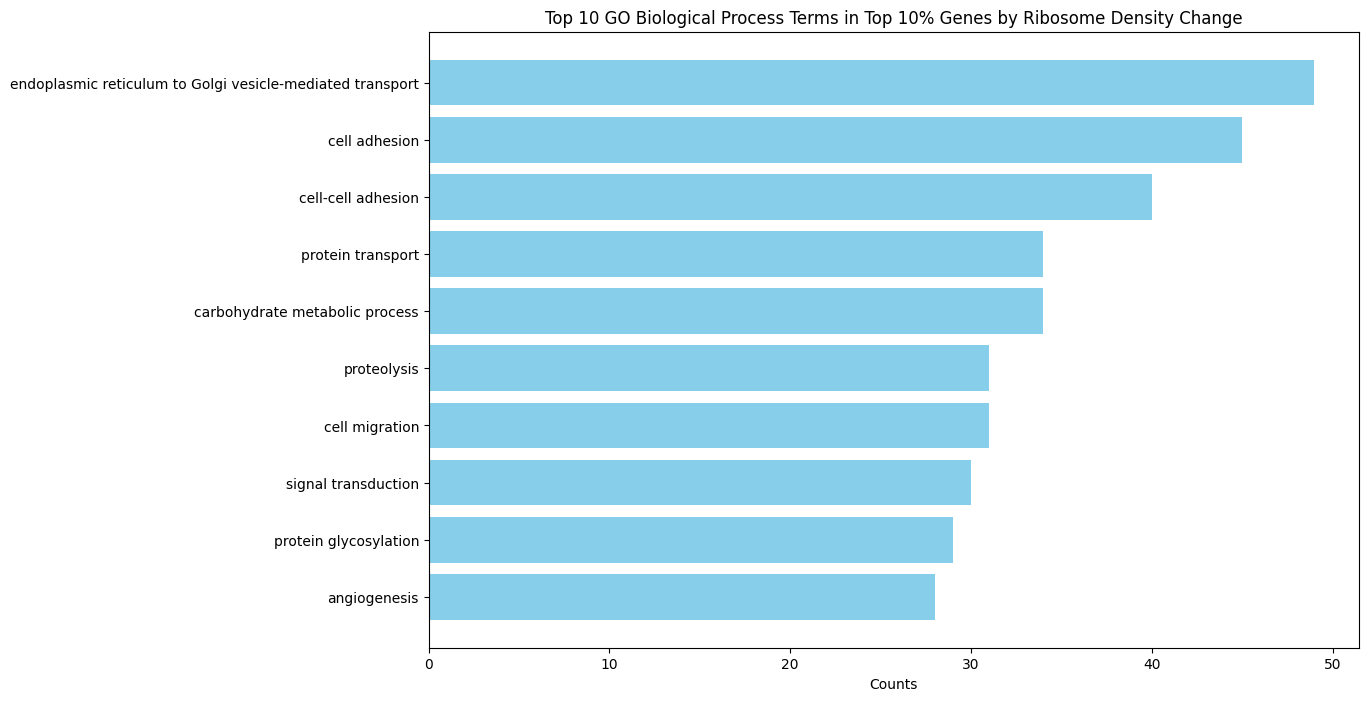

Top 10 GO Biological Process IDs and counts: [('[GO:0045944]', 125), ('[GO:0006357]', 103), ('[GO:0000122]', 91), ('[GO:0006355]', 67), ('[GO:0006281]', 57), ('[GO:0006886]', 54), ('[GO:0016310]', 52), ('[GO:0000398]', 51), ('[GO:0000226]', 49), ('[GO:0045893]', 44)]
go-basic.obo: fmt(1.2) rel(2024-04-24) 45,667 Terms

Top 10 GO Biological Processes in Human-Readable Terms:
GO:0045944: positive regulation of transcription by RNA polymerase II (125)
GO:0006357: regulation of transcription by RNA polymerase II (103)
GO:0000122: negative regulation of transcription by RNA polymerase II (91)
GO:0006355: regulation of DNA-templated transcription (67)
GO:0006281: DNA repair (57)
GO:0006886: intracellular protein transport (54)
GO:0016310: phosphorylation (52)
GO:0000398: mRNA splicing, via spliceosome (51)
GO:0000226: microtubule cytoskeleton organization (49)
GO:0045893: positive regulation of DNA-templated transcription (44)


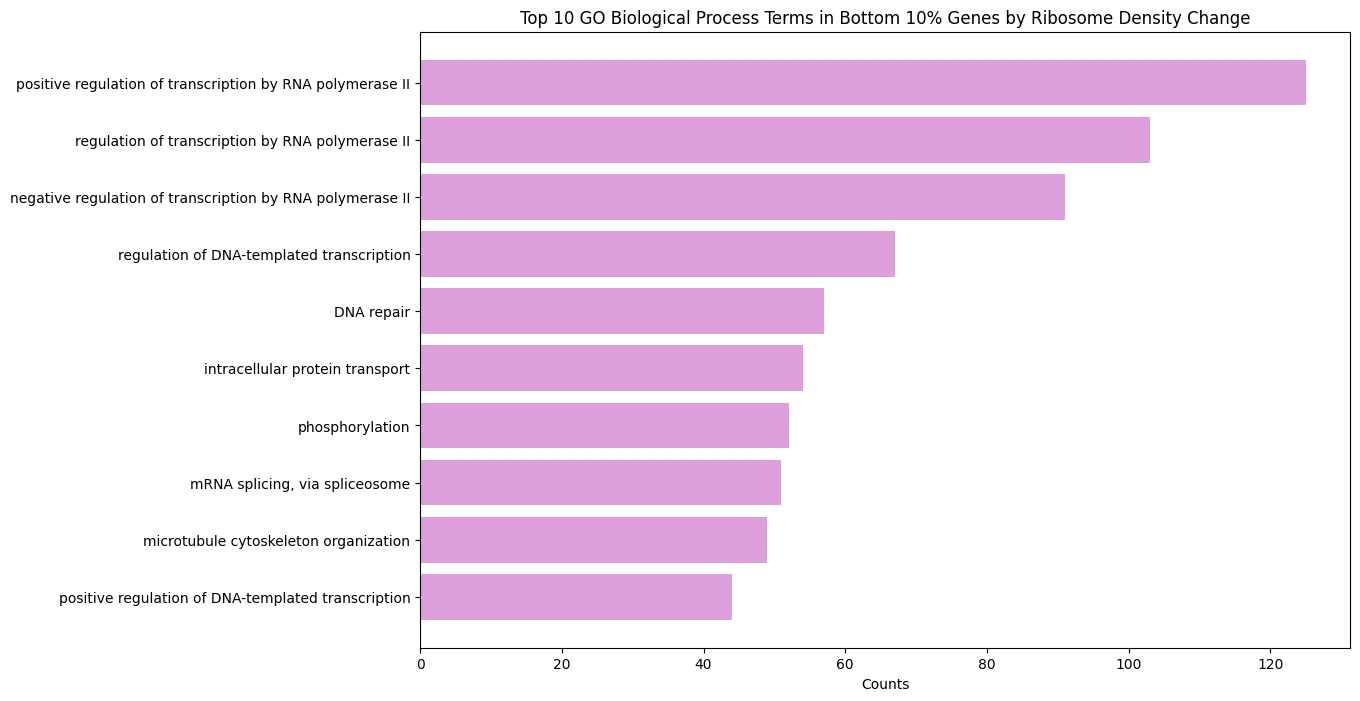

In [ ]:
cal_go(top_10_percent, 'top')
cal_go(bottom_10_percent, 'bottom')

In [ ]:
!pip install goatools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 28.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 5.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=09f381406731e9c5a47085a189ac5a7213b419025634691c1f3ad70fc22f1550
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import requests

url = "http://current.geneontology.org/ontology/go-basic.obo"
response = requests.get(url)
with open("go-basic.obo", "wb") as file:
    file.write(response.content)


Top 10 GO Biological Process IDs and counts: [('[GO:0006888]', 49), ('[GO:0007155]', 45), ('[GO:0098609]', 40), ('[GO:0015031]', 34), ('[GO:0005975]', 34), ('[GO:0006508]', 31), ('[GO:0016477]', 31), ('[GO:0007165]', 30), ('[GO:0006486]', 29), ('[GO:0001525]', 28)]
go-basic.obo: fmt(1.2) rel(2024-04-24) 45,667 Terms

Top 10 GO Biological Processes in Human-Readable Terms:
GO:0006888: endoplasmic reticulum to Golgi vesicle-mediated transport (49)
GO:0007155: cell adhesion (45)
GO:0098609: cell-cell adhesion (40)
GO:0015031: protein transport (34)
GO:0005975: carbohydrate metabolic process (34)
GO:0006508: proteolysis (31)
GO:0016477: cell migration (31)
GO:0007165: signal transduction (30)
GO:0006486: protein glycosylation (29)
GO:0001525: angiogenesis (28)


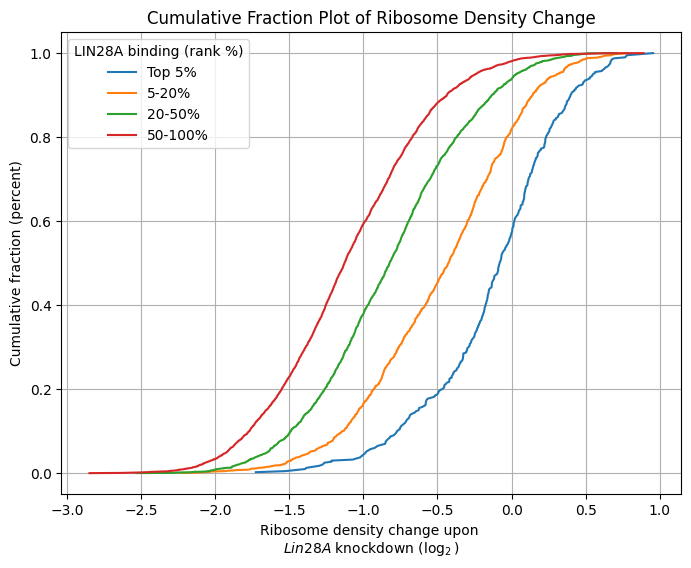

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

In [ ]:
plt.figure(figsize=(8, 6))

for group in groups:
    group_data = cnts[cnts['group'] == group]['rden_change_log2'].sort_values()
    cumulative_fraction = np.arange(1, len(group_data) + 1) / len(group_data)
    plt.plot(group_data, cumulative_fraction, label=group)


plt.xlabel('Ribosome density change upon ' + '\n' + r'$\mathit{Lin28A}$ knockdown ($\log_2$)')
plt.ylabel('Cumulative fraction (percent)')
plt.legend(title='LIN28A binding (rank %)')
plt.title('Cumulative Fraction Plot of Ribosome Density Change')
plt.grid(True)
plt.show()

Text(6.5, -2.95, 'r = 0.4787')

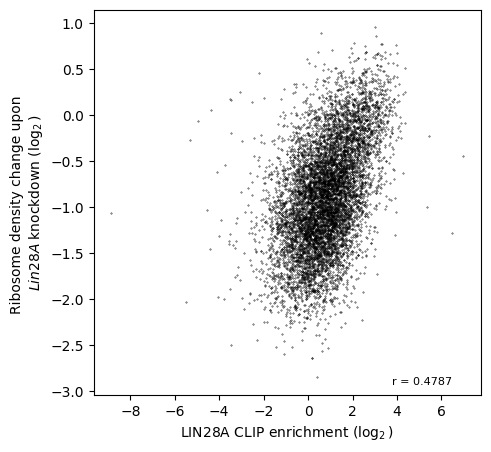

In [ ]:
# 여기에 코드를 새로 작성해서 논문의 그림과 비슷하게 만들어 봅니다.
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

r, p_value = pearsonr(np.log2(cnt_df['clip_enrichment']), np.log2(cnt_df['rden_change']))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnt_df['clip_enrichment']),
           np.log2(cnt_df['rden_change']), color='black', alpha=1, s=0.1)

# Set labels
ax.set_ylabel('Ribosome density change upon ' + '\n' + r'$\mathit{Lin28A}$ knockdown ($\log_2$)')
ax.set_xlabel(r'LIN28A CLIP enrichment ($\log_2$)')
# Add r value
ax.text(6.5,-2.95, f'r = {r:.4f}',
        fontsize=8, ha='right', va='bottom')

## Protein localization 반영하기

논문 그림(Figure 5B, S6A)에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.rename(columns={'gene_id': 'Geneid'}, inplace=True)

mouselocal.head()


,Geneid,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [ ]:
mouselocal.columns

Index(['Geneid', 'Gene names', 'type'], dtype='object')

In [ ]:
cnt_df.head()
cnt_df.reset_index(inplace=True)

이제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.

In [ ]:
cnts_df = cnt_df

cnts_df['Geneid'] = cnts_df['Geneid'].str.split('.').str[0]
cnts_df = cnts_df.merge(mouselocal, how = 'left', on = 'Geneid')
cnts_df['type'] = cnts_df['type'].fillna('unknown')
cnts_df.head()

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,clip_enrichment_log2,rden_change_log2,Gene names,type
0,ENSMUSG00000033845,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,0,1355,3022,2563,1859,3191,2.962362,0.494091,1.566748,-1.017152,NaN,unknown
1,ENSMUSG00000033813,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,0,762,2130,2225,328,609,2.175853,0.562609,1.121581,-0.829795,NaN,unknown
2,ENSMUSG00000033793,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,0,474,1260,1031,603,1128,2.343882,0.437418,1.228900,-1.192917,NaN,unknown
3,ENSMUSG00000025907,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,0,280,694,903,132,251,5.428571,0.684272,2.440573,-0.547359,Rb1cc1 Cc1 Kiaa0203,nucleus
4,ENSMUSG00000051285,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,3508,0,529,2360,1775,208,138,6.631380,1.133628,2.729309,0.180947,Pcmtd1,cytoplasm


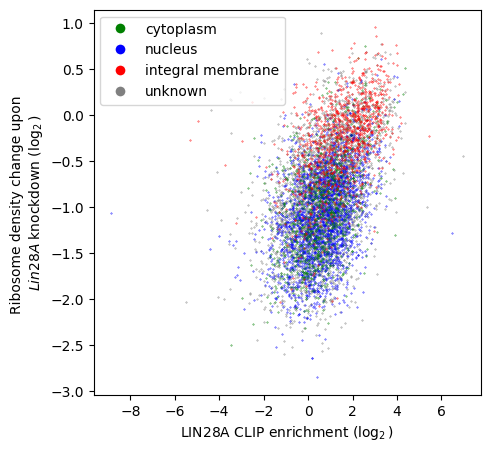

In [ ]:
# 여기에 코드를 새로 작성해서 논문의 그림과 비슷하게 만들어 봅니다.
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
colors = {'cytoplasm': 'green', 'nucleus': 'blue', 'integral membrane': 'red', 'unknown': 'gray'}
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for t in cnts_df['type'].unique():
    df_subset = cnts_df[cnts_df['type'] == t]
    ax.scatter(df_subset['clip_enrichment_log2'], df_subset['rden_change_log2'],
                color=colors[t], label=t, alpha=1, s = 0.1)
# Set labels
ax.set_ylabel('Ribosome density change upon ' + '\n' + r'$\mathit{Lin28A}$ knockdown ($\log_2$)')
ax.set_xlabel(r'LIN28A CLIP enrichment ($\log_2$)')

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=8, markerfacecolor=color)
                  for label, color in colors.items()]
ax.legend(handles=legend_handles)